## Machine Learning for Mechanical Engineering
## HW6

### Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/Users/GYUNAM/.pyenv/versions/3.4.5/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


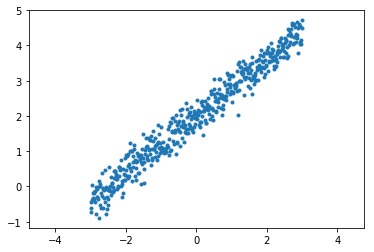

In [2]:
# Data Generation

m =  500

data_x = np.linspace(-3, 3, m)
data_y = 0.8*data_x + 2 + np.random.randn(m)*0.3
 
plt.plot(data_x, data_y, '.')
plt.axis('equal')
plt.show()

We will build the simplest ANN model as shown in the following figure in order to find the best line fit (i.e., linear regression) for the given training data set. Note that there is no hidden layer, and both the input and output layer have only one neuron.

In [3]:

# the sizes of input and output

n_input = 1
n_output =1

In [4]:
# define decision variables in tf

weights = {
    'w' : tf.Variable(tf.random_normal([n_input, n_output],stddev=0.1)),
}

biases = {
    'b' : tf.Variable(tf.random_normal([n_output],stddev=0.1)),
}

In [5]:
# define placeholders

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

In [6]:
# define model

def model(x, weights, biases):
    #output layer
    output = tf.add(tf.matmul(x,weights['w']), biases['b'])
    return output

In [7]:
# define loss

pred = model(x, weights, biases)
loss = tf.reduce_mean(tf.square(pred-y))

In [8]:
# define an optimizer

LR = 0.01
optm = tf.train.AdamOptimizer(LR).minimize(loss)

In [9]:

# tf.Variable initializer

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [10]:
# define parameters 

n_batch = 500
n_iter = 2500
n_prt = 250

In [13]:
# we provide 'next_batch function' for your convenience 

def next_batch(x, y, n_batch):
    m = x.shape[0]
    idx = np.random.randint(0, m, n_batch)
    x_train, y_train = x[idx].reshape(-1,1), y[idx].reshape(-1,1)
    return x_train, y_train

In [14]:
# optimizing

for epoch in range(n_iter):
    train_x, train_y = next_batch(data_x, data_y, n_batch)
    sess.run(optm, feed_dict={x:train_x, y:train_y})
    if epoch % n_prt == 0:
        c = sess.run(loss, feed_dict={x: train_x, y:train_y})
        print("Iter: {}".format(epoch))
        print("Cost: {}".format(c))0j0---adfadsfjkhldfadfdfgdgadfddfasdgasdqwerqwer

Iter: 0
Cost: 6.3960185050964355
Iter: 250
Cost: 0.1816890388727188
Iter: 500
Cost: 0.07691281288862228
Iter: 750
Cost: 0.07940062880516052
Iter: 1000
Cost: 0.0714581236243248
Iter: 1250
Cost: 0.08171138912439346
Iter: 1500
Cost: 0.08382724970579147
Iter: 1750
Cost: 0.08480402827262878
Iter: 2000
Cost: 0.08020384609699249
Iter: 2250
Cost: 0.07690861821174622


In [15]:
w = sess.run(weights['w'])
b = sess.run(biases['b'])

w_hat = w[0,0]
b_hat = b[0]

print ("w_hat : {}".format(w_hat))
print ("b_hat : {}".format(b_hat))

w_hat : 0.8052182197570801
b_hat : 2.0097315311431885


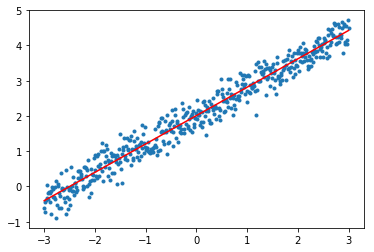

In [16]:
# plot

learned_y = data_x*w_hat + b_hat

plt.plot(data_x, data_y, '.')
plt.plot(data_x, learned_y, 'r')
plt.show()